# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliares: Catherine Benavides y Consuelo Rojas
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Melanie Peña Torres
- Nombre de alumno 2: Valentina Rojas Osorio

### **Link de repositorio de GitHub:** `http://....`


### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

*Escriba su respuesta aquí*

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje] ✅

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto] ✅

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos] ✅

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos] ✅

**Respuesta:**

In [3]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [4]:
# Punto 1
df = pd.read_csv('stats_players.csv')
df['label'] = df['National_Position'].apply(lambda x: 'Seleccionado' if pd.notna(x) else 'No seleccionado')
df.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,Seleccionado
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,Seleccionado
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,Seleccionado
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,69,77,87,94,86,86,84,85,88,Seleccionado
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,Seleccionado


Según lo que entendemos del enunciado, aquellos valores nulos presentes en la columna `National_Position` significan que los jugadores no van a ser seleccionados, por lo que se les aplica la etiqueta de `No seleccionado`. En cambio, aquellos registros que sí estén rellenados con cualquier tipo de valor significan que el jugador sí va a ser seleccionado, por lo que se les aplica la etiqueta de `Seleccionado`.

In [5]:
# Punto 2
df['label'].value_counts()

label
No seleccionado    16513
Seleccionado        1075
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               17588 non-null  object
 1   Nationality        17588 non-null  object
 2   National_Position  1075 non-null   object
 3   Club_Position      17587 non-null  object
 4   Height             17588 non-null  int64 
 5   Weight             17588 non-null  int64 
 6   Preffered_Foot     17588 non-null  object
 7   Age                17588 non-null  int64 
 8   Work_Rate          17588 non-null  object
 9   Weak_foot          17588 non-null  int64 
 10  Skill_Moves        17588 non-null  int64 
 11  Ball_Control       17588 non-null  int64 
 12  Dribbling          17588 non-null  int64 
 13  Marking            17588 non-null  int64 
 14  Sliding_Tackle     17588 non-null  int64 
 15  Standing_Tackle    17588 non-null  int64 
 16  Aggression         17588 non-null  int64

Podemos notar que hay una gran cantidad de registros con jugadores  `No seleccionado` a partir del etiquetado realizado anteriormente, alcanzando un total de 16,513 registros de un total de 17,588. Esto significa que casi el 94% de los jugadores no fueron seleccionados, quedando una parte muy pequeña de estos jugadores como seleccionados para jugar. Por lo tanto, se podría asumir que solo una pequeña cantidad de jugadores posee las cualidades suficientes para ser parte de la selección que representa a su país, siendo estos la élite de jugadores.


In [7]:
df.select_dtypes(include=['object']).columns

Index(['Name', 'Nationality', 'National_Position', 'Club_Position',
       'Preffered_Foot', 'Work_Rate', 'label'],
      dtype='object')

In [8]:
df.select_dtypes(include=['int64']).columns

Index(['Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Ball_Control',
       'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
       'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure',
       'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed',
       'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading',
       'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy',
       'Penalties', 'Volleys'],
      dtype='object')

In [9]:
#columnas para one hot encoder
batch_1 = ['Nationality', 'Club_Position','Preffered_Foot', 'Work_Rate']
#columnas para standard scaler
batch_2 = ['Height', 'Weight', 'Age', 'Ball_Control',
       'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
       'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure',
       'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed',
       'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading',
       'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy',
       'Penalties', 'Volleys']
#columnas ya codificadas
batch_3 = ['Skill_Moves','Weak_foot']

In [10]:
# Punto 3
col_transformer = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'),  batch_1),
        ('StandardScaler', StandardScaler(), batch_2)],
        remainder='passthrough')

Punto 4 :

Analizamos detalladamente los datos en `Player_Stats_Report.html`, además de utilizar la función `select_dtypes` para verificar qué tipos de columnas existían dentro de los registros. Verificamos que dos columnas en particular, `Skill_Moves` y `Weak_foot`, corresponden a columnas con valores numéricos, pero tenemos la idea de que sus valores corresponden a niveles que indican cuán buenas son estas habilidades y cuán débil es su peor pie en una escala del 1 al 5. Esto lo confirmamos dentro del `html` dado que considera esas variables como categóricas.

Finalmente, separamos las columnas para el `column_transformer` en batches. El batch_1 corresponde a las columnas categóricas que se van a utilizar. Cabe notar que `Name`, `National_Position` y `label` no se encuentran presentes en este batch. No incluimos `Name` dado que estimamos que los nombres de los jugadores no son un factor que deba influir en si este será un jugador seleccionado o no. `National_Position` no se incluye dado que se debe utilizar `label` para el modelo, y no se incluye `label` dado que este será el target del modelo y debe estar separado. Utilizamos el transformador `One Hot Encoder` sobre estas variables categóricas para convertirlas en una representación binaria, permitiendo que el modelo pueda procesarlas sin asumir un orden o jerarquía entre las categorías.

El batch_2 corresponde a las variables numéricas del dataframe que confirmamos sean datos numéricos reales, es decir, que no representen niveles o similares. Se incluyen todas las variables numéricas identificadas con `select_dtypes` y confirmadas con el `html`. Utilizamos el transformador `StandardScaler` para normalizar estas variables numéricas, ajustando sus valores para que tengan una media de 0 y una desviación estándar de 1.

Finalmente, identificamos en un batch_3 las columnas que ya están codificadas pero que no deben pasar por ningún transformador. Estas corresponden a las dos variables identificadas anteriormente, `Skill_Moves` y `Weak_foot`.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos] ✅


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos] ✅

3. Entrene los pipelines. [1 punto] ✅



**Respuesta:**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [29]:
# Punto 1
data = df.drop(columns=['label','Name','National_Position'])
target = df['label']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)

Dropeamos las columnas especificadas en el punto 4 de la sección anterior, creando así una variable `data` y una variable `target` para el modelo. Separamos los datos en un 20% para el testeo y un 80% para el entrenamiento. Añadimos un `seed` con valor 42 para mantener la aleatoriedad de los datos. Además, para mantener la proporción por clase, se añade el parámetro `stratify` con respecto a `labels`. Hay que notar que `label` posee las clases de `Seleccionado` y `No seleccionado`, pero para la evaluación del modelo necesitan ser codificadas de manera numérica, por lo que se utiliza un `LabelEncoder` para poder codificarlas.

In [30]:
# Codificación de las variables de label
label = LabelEncoder()
y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)

In [31]:
label.classes_

array(['No seleccionado', 'Seleccionado'], dtype=object)

In [32]:
label.fit_transform(['No seleccionado', 'Seleccionado'])

array([0, 1], dtype=int64)

* 0 representa a `No Seleccionado`
* 1 representa a `Seleccionado`

In [33]:
# Punto 2
pipeline_xgboost = Pipeline(steps=[('preprocessor', col_transformer),
                        ('classifier', XGBClassifier())])
pipeline_lightbm = Pipeline(steps=[('preprocessor', col_transformer),  
                        ('classifier', LGBMClassifier(verbose=-1))])

In [34]:
# Punto 3.1
xgboost_trained = pipeline_xgboost.fit(X_train, y_train)

In [35]:
# Punto 3.2
lightbm_trained = pipeline_lightbm.fit(X_train, y_train)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [36]:
from sklearn.metrics import classification_report

In [37]:
#Punto 1.1
print('XGBoost Score for Player Classification regarding National_Position/label') 
print(classification_report(y_test, xgboost_trained.predict(X_test)))

XGBoost Score for Player Classification regarding National_Position/label
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3303
           1       0.66      0.38      0.48       215

    accuracy                           0.95      3518
   macro avg       0.81      0.68      0.73      3518
weighted avg       0.94      0.95      0.94      3518



In [38]:
#Punto 1.2
print('LightGBM Score for Player Classification regarding National_Position/label')
print(classification_report(y_test, lightbm_trained.predict(X_test)))

LightGBM Score for Player Classification regarding National_Position/label
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3303
           1       0.68      0.36      0.47       215

    accuracy                           0.95      3518
   macro avg       0.82      0.67      0.72      3518
weighted avg       0.94      0.95      0.94      3518



Punto 2 :


* **Accuracy**: Esta métrica corresponde a la proporción de predicciones correctas con respecto al total de predicciones. Podemos notar que ambos modelos, tanto XGBoost como LightGBM, obtienen altos valores de `accuracy`. Sin embargo, esto corresponde a un valor engañoso en este caso, dado que hay una mayor cantidad de registros con la clase 0 (`No seleccionado`). Esto significa que la accuracy está altamente influenciada por estos valores, por lo que se puede afirmar que es un buen clasificador para verificar que un jugador no sea seleccionado, pero no se puede decir lo mismo para verificar si un jugador es seleccionado.

* **Precision**: Esta métrica corresponde a la proporción de predicciones `True Positive` (jugadores correctamente identificados como seleccionados para jugar) sobre el total de verdaderos positivas (`True Positive + False Positive`). Podemos notar que el modelo XGBoost posee una precisión para la clase 1 (`Seleccionado`) de 0.66 y el modelo LightGBM de 0.68. Podemos afirmar que este es un valor aceptable al ser mayor de 0.5, pero no es de los mejores, dado que sería ideal obtener métricas mayores o similares a 0.7 (meta planteada por nosotras). Este valor puede demostrar que hay muchas predicciones `False Positive` para ambos modelos (dado que obtienen valores similares), lo que significa que los modelos están identificando incorrectamente a jugadores como seleccionados cuando no lo son en verdad.

* **Recall**: Esta métrica corresponde a la proporción de predicciones `True Positive` con respecto al total de positivos reales (`True Positive + False Negative`). Podemos notar que el modelo XGBoost posee un recall para la clase 1 (`Seleccionado`) de 0.38 y el modelo LightGBM posee un recall de 0.36, por lo que podemos afirmar que ambos modelos están fallando al identificar a los jugadores que de verdad deben ser seleccionados.

Como podemos verificar del `classification_report`, todos los modelos para esta clase poseen métricas bajas (esto depende de cómo se definieron las metas del modelo; nosotras estimamos que valores desde 0.7 y más son mejores). Esto se debe a que se tiene muy pocos datos de jugadores `Seleccionados`, que como vimos anteriormente, son solo 1075 de un total de 17588, por lo que hay un claro desbalance de clases que resulta en estas métricas para el modelo. Como podemos ver, las métricas para la clase 0 en cambio son altas, dado que se tiene una mayor cantidad de estos, por lo que los modelos son buenos clasificadores para esta clase pero no para la clase 1, dado que estos modelos no tienen suficientes datos para aprender los `features` de esta clase minoritaria.

Punto 3 :

A partir de todo el análisis y visualización anteriores, podemos verificar que ambos modelos obtienen métricas muy similares. De hecho, sus valores difieren en solo unos 0.03-0.02 como máximo. Por esta razón, es difícil determinar con certeza qué métrica sería la más adecuada para decidir cuál modelo es mejor. Sin embargo, vamos a tomar como métrica definitiva el `F1-score`, que combina tanto la `Precision` como el `Recall` en una métrica única, siendo una media harmónica de estos. Un valor de `F1-score` igual a 1 indica una `Precision` y `Recall` perfectas, mientras que un valor de 0 significa que tanto la `Precision` como el `Recall` son 0. Basándonos en esta métrica, dado que XGBoost obtiene un valor ligeramente mayor que LightGBM, elegimos finalmente XGBoost como el mejor modelo.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección. ✅
2. Cuente cuántos por clase quedan. ✅
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  ✅
4. Comente los resultados obtenidos. ✅

**Respuesta:**

In [40]:
df['Club_Position'].unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', nan, 'CF'],
      dtype=object)

Al analizar detenidamente los valores dentro de la columna `Club_Position`, observamos que, a pesar de que se nos solicita agrupar ciertos valores para las nuevas etiquetas, hay algunos valores aparte de `Sub` y `Res` que no se utilizan, como `LAM`. Por lo tanto, filtramos el DataFrame de manera que obtengamos un nuevo DataFrame `df_clubes` que contenga únicamente los valores necesarios para obtener las etiquetas requeridas.

In [41]:
clubes = ['STF','CF', 'RW', 'CAM','LW', 'RM','CM','LM', 'RWB','CDM','LWB', 'RB','CB','LB','GK']
df_clubes = df[df['Club_Position'].isin(clubes)]

In [42]:
df_clubes.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,Seleccionado
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,Seleccionado
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,Seleccionado
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,Seleccionado
5,De Gea,Spain,GK,GK,193,82,Right,26,Medium / Medium,3,...,67,21,31,13,12,21,19,40,13,Seleccionado


In [43]:
df_clubes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3513 entries, 0 to 17442
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               3513 non-null   object
 1   Nationality        3513 non-null   object
 2   National_Position  325 non-null    object
 3   Club_Position      3513 non-null   object
 4   Height             3513 non-null   int64 
 5   Weight             3513 non-null   int64 
 6   Preffered_Foot     3513 non-null   object
 7   Age                3513 non-null   int64 
 8   Work_Rate          3513 non-null   object
 9   Weak_foot          3513 non-null   int64 
 10  Skill_Moves        3513 non-null   int64 
 11  Ball_Control       3513 non-null   int64 
 12  Dribbling          3513 non-null   int64 
 13  Marking            3513 non-null   int64 
 14  Sliding_Tackle     3513 non-null   int64 
 15  Standing_Tackle    3513 non-null   int64 
 16  Aggression         3513 non-null   int64 
 17 

In [44]:
def posiciones(club):
    if club in ['STF','CF']: return 'ataque'
    elif club in ['RW', 'CAM','LW']: return 'central_ataque'
    elif club in ['RM','CM','LM'] :return 'central'
    elif club in ['RWB','CDM','LWB'] : return 'central_defensa'
    elif club in ['RB','CB','LB'] : return 'defensa'
    elif club in ['GK'] : return 'arquero'

In [45]:
df_clubes['Club_Position'] = df_clubes['Club_Position'].apply(posiciones)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3076\3535156775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clubes['Club_Position'] = df_clubes['Club_Position'].apply(posiciones)


In [47]:
df_clubes.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
0,Cristiano Ronaldo,Portugal,LS,central_ataque,185,80,Right,32,High / Low,4,...,95,85,92,93,90,81,76,85,88,Seleccionado
1,Lionel Messi,Argentina,RW,central_ataque,170,72,Left,29,Medium / Medium,4,...,68,71,85,95,88,89,90,74,85,Seleccionado
2,Neymar,Brazil,LW,central_ataque,174,68,Right,25,High / Medium,5,...,61,62,78,89,77,79,84,81,83,Seleccionado
4,Manuel Neuer,Germany,GK,arquero,193,92,Right,31,Medium / Medium,4,...,78,25,25,13,16,14,11,47,11,Seleccionado
5,De Gea,Spain,GK,arquero,193,82,Right,26,Medium / Medium,3,...,67,21,31,13,12,21,19,40,13,Seleccionado


In [48]:
# Punto 2
df_clubes['Club_Position'].value_counts()

Club_Position
defensa            1180
central             907
arquero             632
central_ataque      581
central_defensa     209
ataque                4
Name: count, dtype: int64

In [58]:
# Punto 3

#columnas para one hot encoder
nbatch_1 = ['Nationality','Preffered_Foot', 'Work_Rate','label']
#columnas para standard scaler
nbatch_2 = ['Height', 'Weight', 'Age', 'Ball_Control',
       'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle',
       'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure',
       'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed',
       'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading',
       'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy',
       'Penalties', 'Volleys']
#columnas ya codificadas
nbatch_3 = ['Skill_Moves','Weak_foot']

Notemos que para el batch de variables categóricas quitamos obviamente `Club_Position`, dado que este será el nuevo target del clasificador. Tampoco está presente `National_Position`, dado que vamos a utilizar `label`, que es una mejor aproximación. Como no se dice si se puede usar o no, nosotras decidimos usar esta columna. Tampoco está presente `Name` por las razones expuestas anteriormente. De aquí en adelante realizamos los mismos pasos de la sección anterior!

In [75]:
ncol_transformer= ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'), nbatch_1),
        ('StandardScaler', StandardScaler(), nbatch_2)],
        remainder='passthrough')

In [77]:
ndata = df_clubes.drop(columns=['Club_Position','Name','National_Position'])
ntarget = df_clubes['Club_Position']

X_train2, X_test2, y_train2, y_test2 = train_test_split(ndata, ntarget, test_size=0.2, random_state=42, stratify=ntarget) #aplicamos stratify para mantener la proporción de las clases!!

In [78]:
# Codificación de las variables de Club_Position
label2= LabelEncoder()
y_train2 = label2.fit_transform(y_train2)
y_test2 = label2.transform(y_test2)

In [81]:
from sklearn.svm import SVC

El clasificador elegido finalmente corresponde a `Support Vector Machine`, específicamente utilizando la variante para clasificación multi-clase conocida como Linear SVC (Support Vector Classification Lineal), como se sugiere en la guía proporcionada por scikit-learn . (start - >50 samples - predecting a category - do you have labeled data - <100k samples - Linear SVC). Esta elección se basó en la naturaleza de nuestro problema, que implica la clasificación de múltiples categorías, en este caso, posiciones de jugadores. Una de las ventajas de utilizar SVM es su capacidad para manejar eficientemente problemas de clasificación multi-clase.

In [97]:
pipeline_SVC = Pipeline(steps=[('preprocessor', ncol_transformer),
                        ('classifier', SVC(kernel='linear'))])

In [98]:
SVC_trained = pipeline_SVC.fit(X_train2, y_train2)

In [99]:
print('Support Vector Machine Score for Position Classification regarding Club_Position')
print(classification_report(y_test2, SVC_trained.predict(X_test2)))

Support Vector Machine Score for Position Classification regarding Club_Position
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       0.00      0.00      0.00         1
           2       0.57      0.60      0.59       182
           3       0.49      0.46      0.47       116
           4       0.47      0.17      0.25        42
           5       0.85      0.94      0.89       236

    accuracy                           0.74       703
   macro avg       0.56      0.53      0.53       703
weighted avg       0.72      0.74      0.72       703



c:\Users\Usuario\miniconda3\envs\jaleaenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\miniconda3\envs\jaleaenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\miniconda3\envs\jaleaenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

Punto 4 : 

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 3.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] 


Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [41]:
from pycaret.classification import compare_models, create_model
from pycaret.regression import *
from pycaret.classification import *

In [33]:
ewe = LabelEncoder()
target = ewe.fit_transform(target)

In [43]:
a = setup(data, target=target)

tree_models = compare_models(include=['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost'], fold = 10)

,Description,Value
0,Session id,2522
1,Target,target
2,Target type,Binary
3,Original data shape,"(17588, 38)"
4,Transformed data shape,"(17588, 46)"
5,Transformed train set shape,"(12311, 46)"
6,Transformed test set shape,"(5277, 46)"
7,Numeric features,33
8,Categorical features,4
9,Rows with missing values,0.0%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9534,0.9611,0.4441,0.6819,0.5369,0.5135,0.5271,4.4480
lightgbm,Light Gradient Boosting Machine,0.9529,0.9608,0.4467,0.6743,0.5368,0.5130,0.5255,0.1540
xgboost,Extreme Gradient Boosting,0.9505,0.9594,0.4441,0.6389,0.5223,0.4972,0.5072,0.1230
rf,Random Forest Classifier,0.9483,0.9462,0.2420,0.7421,0.3628,0.3431,0.4036,0.2800
et,Extra Trees Classifier,0.9437,0.9412,0.1397,0.7185,0.2316,0.2158,0.2979,0.2300
dt,Decision Tree Classifier,0.9319,0.7107,0.4587,0.4485,0.4519,0.4158,0.4167,0.0830


In [44]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9534,0.9611,0.4441,0.6819,0.5369,0.5135,0.5271,4.4790
lightgbm,Light Gradient Boosting Machine,0.9529,0.9608,0.4467,0.6743,0.5368,0.5130,0.5255,0.1480
gbc,Gradient Boosting Classifier,0.9511,0.9575,0.4281,0.6527,0.5163,0.4918,0.5043,0.5510
xgboost,Extreme Gradient Boosting,0.9505,0.9594,0.4441,0.6389,0.5223,0.4972,0.5072,0.1240
rf,Random Forest Classifier,0.9483,0.9462,0.2420,0.7421,0.3628,0.3431,0.4036,0.2520
ada,Ada Boost Classifier,0.9477,0.9495,0.3897,0.6179,0.4757,0.4498,0.4641,0.1870
lr,Logistic Regression,0.9440,0.9243,0.2421,0.6072,0.3443,0.3208,0.3591,0.5480
et,Extra Trees Classifier,0.9437,0.9412,0.1397,0.7185,0.2316,0.2158,0.2979,0.2000
ridge,Ridge Classifier,0.9416,0.9315,0.1264,0.6140,0.2084,0.1915,0.2589,0.0560
dummy,Dummy Classifier,0.9389,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0630


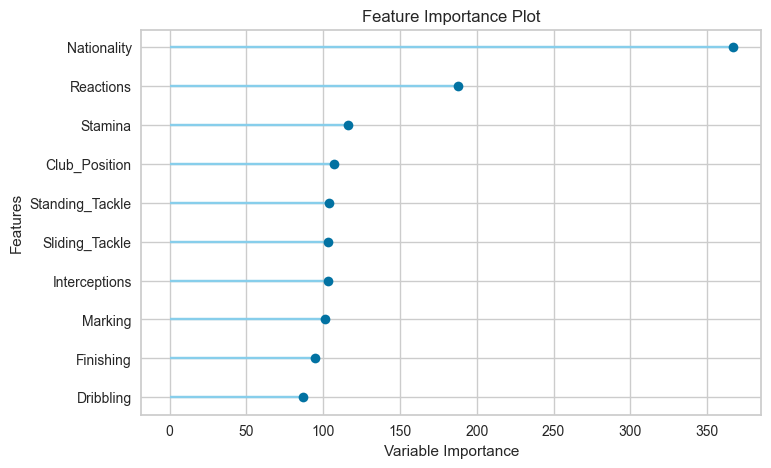

In [47]:
plot_model(final_model, plot='feature')

In [54]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9534,0.9611,0.4441,0.6819,0.5369,0.5135,0.5271,4.5770
lightgbm,Light Gradient Boosting Machine,0.9529,0.9608,0.4467,0.6743,0.5368,0.5130,0.5255,0.1600
gbc,Gradient Boosting Classifier,0.9511,0.9575,0.4281,0.6527,0.5163,0.4918,0.5043,0.5490
xgboost,Extreme Gradient Boosting,0.9505,0.9594,0.4441,0.6389,0.5223,0.4972,0.5072,0.2290
rf,Random Forest Classifier,0.9483,0.9462,0.2420,0.7421,0.3628,0.3431,0.4036,0.2710
ada,Ada Boost Classifier,0.9477,0.9495,0.3897,0.6179,0.4757,0.4498,0.4641,0.2030
lr,Logistic Regression,0.9440,0.9243,0.2421,0.6072,0.3443,0.3208,0.3591,1.2990
et,Extra Trees Classifier,0.9437,0.9412,0.1397,0.7185,0.2316,0.2158,0.2979,0.1970
ridge,Ridge Classifier,0.9416,0.9315,0.1264,0.6140,0.2084,0.1915,0.2589,0.0730
dummy,Dummy Classifier,0.9389,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0570


In [51]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

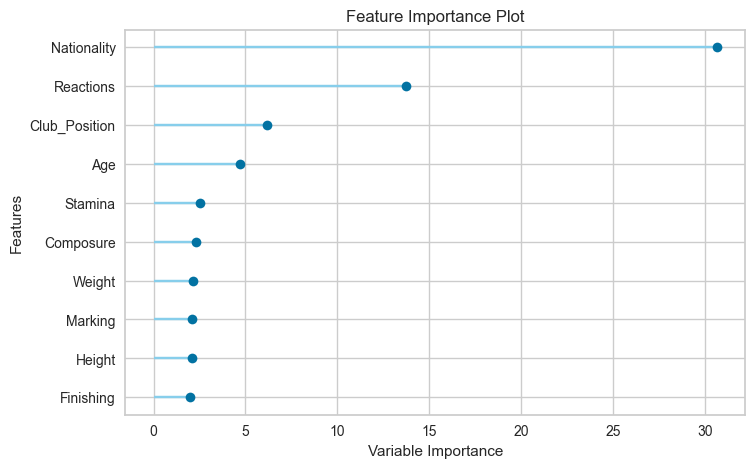

In [57]:
plot_model(best, plot='feature')

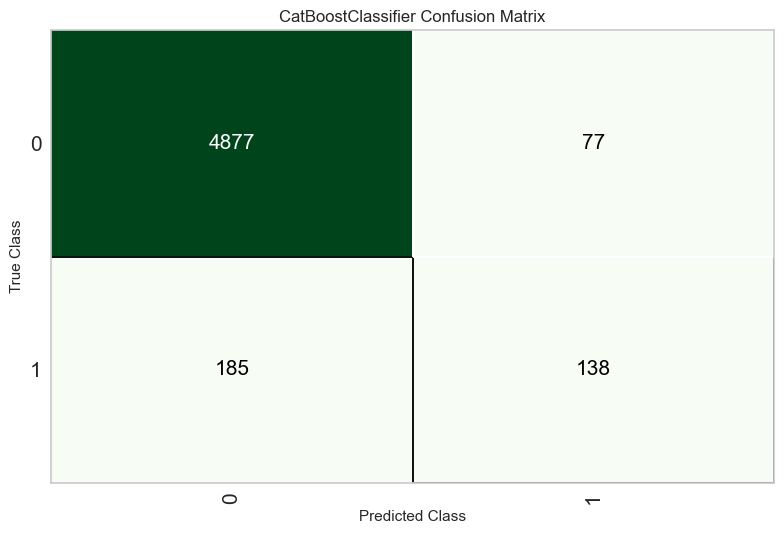

In [58]:
plot_model(best, plot='confusion_matrix')

In [60]:
plot_model(best, plot='learning')

### 3.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de features y desempeño. por esto, si observa que al aumentar features el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

### 3.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**